# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Computing dispersion
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

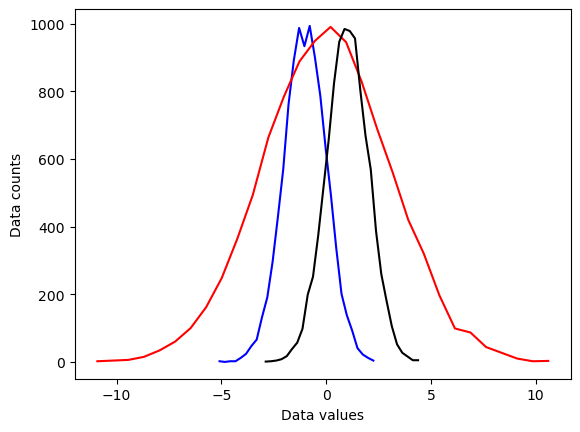

In [2]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [3]:
# side note:

meanval = 10.2
stdval  = 7.5
numsamp = 123

# this
#same as randn from above but we can input the parameters directly
np.random.normal(meanval,stdval,numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval + meanval

array([-2.11055832, 15.40192191, 12.64965497, 10.8251122 , 11.25952208,
       15.08339536, 15.80954509,  4.75534952, 12.81119575,  8.98636094,
       10.8648955 , 16.20026995, 18.35854699,  2.50408405,  8.13285907,
       10.46038559,  2.04193568,  5.53402871,  9.92202996, 13.55131471,
       11.07386322, 14.8323963 , 16.74073916,  9.0479838 , 24.12970605,
        6.93149579, 17.94214694, 18.02909706, 20.22988826,  2.85960271,
        4.56861615, 15.15929782,  1.26332627,  9.78046472, 10.71078713,
       10.17201763,  8.51012304,  4.36459448,  6.80267262,  8.84957766,
       11.90552542, 15.73732614, 13.55823231, 23.81291156,  0.03363203,
       -9.10707303, 16.82406746, 18.64407063, 15.70506274, 10.33400462,
        8.65346758, 30.41209183, 17.00984088, -1.77624619, 17.02260112,
       13.45447094, 16.56921774, 14.49767459,  7.39272669, 18.25860657,
       16.32660278, 11.79075688,  1.92535932,  9.65846168,  4.58756612,
        7.6392193 , 12.14224161, 18.37940075,  2.67113502,  4.28

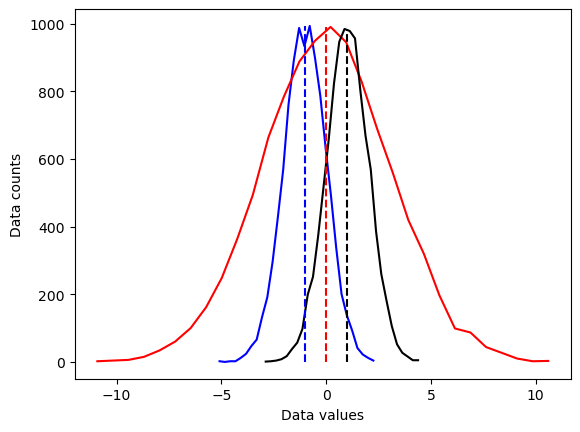

In [4]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [ ]:
## now for the standard deviation

# initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)


# same plot as earlier
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--', [mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now add stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [ ]:
## different variance measures

variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)
    
    # variance
    varmeasures[0,i] = sum(datacent**2) / (N-1)
    
    # "biased" variance
    varmeasures[1,i] = sum(datacent**2) / N
    
    # standard deviation
    varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )
    
    # MAD (mean absolute difference)
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)
    

# show them!
plt.plot(variances,varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

In [ ]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

In [ ]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()